The fitparameters are [ -139.18648992  3123.67441438]
Your covariance matrix of the least square fit is [[   12.7917985   -251.46543891]
 [ -251.46543891  4948.28339443]]


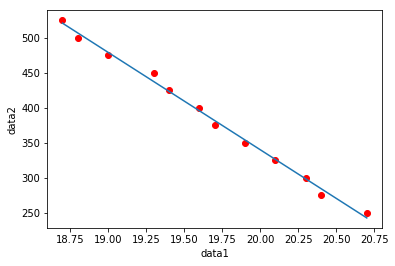

In [6]:
##This cell can perform any polynominal least square fit and display the results. For general fits use the next cell
##Uncomment whatever you don't need
## Copyright 2018 by redundanceredundance
## I'd put this under GPL licence if this works with the licences for juypter and python

import numpy as np
import matplotlib.pyplot as plt

################## import data ##################################
#insert the name of your data file here
data1, data2, data3 = np.loadtxt('exampledata.txt',usecols=(0,1,2),unpack=True)
#put variables separated by commata, the variables will be lists including your data points
#data must be in collumns separated by a tab in a text file
#usecols indicates which collumns you are using eg. if you want to use the first three collumns, you give a tuple
#to the parameter indicating columns 1, 2, 3. Careful, enumeration in python always starts with zero
#python uses American notation, meaning commata are represented by points

################## fit your data with a polynom ############################
fitparameter,covarianz = np.polyfit(data1,data2,1,full=False,cov=True)
#indicate degree of polynominal at third place (1 equals a linear least sqare fit)
#indicate as parameter the data set with your arguments and second the data set with your values corresponding
#to the arguments
print('The fitparameters are', fitparameter)
print('Your covariance matrix of the least square fit is', covarianz)

#fitparameter includes the coefficients of your polynominal starting with the highest order

#calculate data points of your fitfunction
fit = [fitparameter[0]*data + fitparameter[1] for data in data1]

#plot your data as well as your fit
plt.plot(data1,data2,'ro') #for points drawn in a different colour use 'bo' for blue dots etc. Consult the pyplot documentation for this
plt.plot(data1,fit)
#plt.errorbar(xdata,ydata,xerr=errordataofx,yerr=errordataofy) #to plot data with errorbars, if you only want to use errorbars on x or y, just leave out yerr or xerr
#plt.xlim(20,21) #uncomment to set axis intervals and restrict axis to a certain interval
#plt.ylim(300,400) #syntax is as follows : plt.xlim(minimum,maximum), use plt.xlim for x-axis and plt.ylim for y-axis
plt.xlabel('data1')
plt.ylabel('data2')
plt.show()
#save the plot using right click on the plot and then use "save as" function, default for saving is png format


[  20.   23.   26.   29.   32.   35.   38.   41.   44.   47.   50.   53.
   56.   59.   62.   65.   68.   71.   74.   77.   80.   83.   86.   89.
   92.   95.   98.  101.  104.  107.  110.  113.  116.  119.  122.  125.
  128.  131.  134.  137.  140.  143.  146.  149.  152.  155.  158.  161.
  164.  167.  170.  173.  176.  179.  182.  185.  188.  191.  194.  197.
  200.  203.  206.  209.  212.  215.  218.  221.  224.  227.  230.  233.
  236.  239.  242.  245.  248.  251.  254.  257.  260.  263.  266.  269.
  272.  275.  278.  281.  284.  287.  290.  293.  296.  299.  302.  305.
  308.  311.  314.  317.  320.  323.  326.  329.  332.  335.  338.  341.
  344.  347.  350.  353.  356.  359.  362.  365.  368.  371.  374.  377.
  380.  383.  386.  389.  392.  395.  398.  401.  404.  407.  410.  413.
  416.  419.  422.  425.  428.  431.  434.  437.  440.  443.  446.  449.
  452.  455.  458.  461.  464.  467.  470.  473.  476.  479.  482.  485.
  488.  491.  494.  497.  500.  503.  506.  509.  5

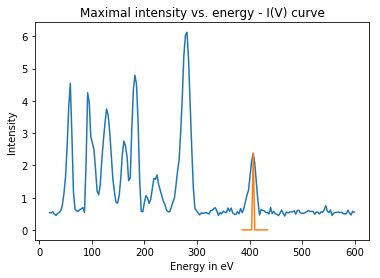

Your beginning of the interval is at 122
Your end of the interval is at 139


In [17]:
#second cell, general nonlinear least square fits 
#define your fit function with the fit parameters and use scipy.optimize
#you can fit about any function that you can imagine. Still there might be some trouble on functions defined over an integral
#such as the error function
#again, copyright 2018 by redundanceredundance
#you are free to use this script, modify it and redistribute it at your will
#I, the author hereby give no guarantee for any results that might be the outcome of your use of this script.

####The example here delivers the position of peaks in a LEED spectrum and will in this form be of use mostly for
####people doing some spectroscopy of any kind.
####It shall illustrate how to define non-linear models in Python and then fit them to data using a least square fit
####The model does not necessarily have to be a Lorentzian fitted to an optical spectrum, it can have any form you like
####and yes, linear fits work as well but it is much easier to use numpy.polyfit for that


import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as S

################## import data ##################################
#insert the name of your data file here
energy, imax, itotal, ibackground = np.loadtxt('examplespectrum.dat',usecols=(0,2,3,4),unpack=True)
#put variables separated by commata, the variables will be lists including your data points
#data must be in collumns separated by a tab in a text file
#usecols indicates which collumns you are using eg. if you want to use the first three collumns, you give a tuple
#to the parameter indicating columns 1, 2, 3. Careful, enumeration in python always starts with zero
#python uses American notation, meaning commata are represented by points

###########I here use Lorentzian fits to a spectrum as an example#######################

#assign new values by substracting background noise
imax_neu = [imax[i] - ibackground[i] for i in range(len(imax))]
itotal_neu = np.array([itotal[i] - ibackground[i] for i in range(len(itotal))])
print(energy)


#######Define your model function here - can be linear, Gaussian, Lorentzian, whatever#####################
#######Important, for fitting scipy optimize needs the data as an array, therefore you don't define your function
#######for a single point or single tuple of points and then create the list with values, but instead the defined 
#######function by you ABSOLUTELY NEEDS TO TAKE A LIST of data points as input and return the model function applied
#######to the data points as an output !!!
#######Then the function needs take the fit parameters as input !!!
def lorentzverteilung(xlist,s,t):
    lorentz = [np.float(1/np.pi)*np.float(s/(s**2+(x-t)**2)) for x in xlist]
    #t - das gesuchte zentrum, die punkte, bei der wir unsere energiemaxima haben
    #s - halbwertsbreite
    #x unsere energiewerte fuer den fit
    return lorentz
#fit function with itotal_neu
#parameters a,b correspond to the optimized parameters s,t from the Lorentzian fit !
#I here restricted the fit to a subset of data points of energy and imax_neu but that's up to you

fitdata, covariance = S.curve_fit(lorentzverteilung,energy[122:139],imax_neu[122:139])
print('Your fitparameter are', fitdata)
print('Your covariance is', covariance)
print('Your maximum is located at', fitdata[1], 'eV')

###############plot data, fit etc##########################

plt.figure(1)
plt.plot(energy,imax_neu)
plt.plot(energy[122:139],lorentzverteilung(energy[122:139],fitdata[0],fitdata[1]))
plt.title('Maximal intensity vs. energy - I(V) curve')
plt.xlabel('Energy in eV')
plt.ylabel('Intensity')
plt.show()

############use for this special script, to determine the intervall in which the maxima lie so that you can
############optimally use the Lorentzian fit for your maxima

#benutzung : wir wollen die peaks einzeln plotten. search in your plot the interval in which your peak is located and then
#####search corresponding values in the list
#beispielsweise grosser peak zwischen 250 und 300 ev
#gucke in liste, welche werte da rankommen -> zb 251 und 296
liste = copy.deepcopy(energy)
energy2 = list(liste)
ersteposition = energy2.index(386) #put interval limits as seen in the list below here, the beginning of your interval
letzteposition = energy2.index(437) #and the end of your interval -> you give the x-axis interval and get the corresponding 
#entries in the list which you need to restrict the fit to this subset of data points in the interval
print('Your beginning of the interval is at', ersteposition)
print('Your end of the interval is at', letzteposition)
